# Machine Learning (Summer 2018)

## Homework 5
- Implement a Perceptron. 
- Train and test it for the Iris data set below 
- Visualise the data points and
the decission boundry of your trained 
Perceptron on a 2D plot (petal length vs
petal width)
- Compare to sklearn implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

#### Implementing a Perceptron

In [49]:
class Perceptron:


    def __init__(self, weights: [float] = [], 
                 bias: float = 1,
                 learning_rate: float = 0.001,
                 max_iterations: int = 10000):
        self.weights = weights
        self.bias = bias
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations # or epoch


    def fit(self, X, y):
        for i in range(self.max_iterations):
            neededAdjusments = False
            for x, target in zip(X, y):
                result = self.predict(x)
                if result != target: 
                    adjust = (result - target)
                    # Adjust bias                     
                    self.bias -= self.learning_rate * adjust
                    # Adjust weights
                    self.weights = [w - self.learning_rate * adjust * x  
                                    for (x, w) in zip(x, self.weights)]
                    # Toggle flag on
                    neededAdjusments = True
            if not neededAdjusments:
                # Neurons are 'perfectly' fitter for the dataset
                print("Network fitted in epoch", i)
                return


    def predict(self, x):
        result = sum([x * w for (x, w) in zip(x, self.weights)]) + self.bias
        return 0 if result <= 0 else 1

#### Training

In [64]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

rand_weights = [(2 * np.random.random()) - 1 for _ in range(2)]
rand_bias = 2 * np.random.random() - 1

network = Perceptron(rand_weights, rand_bias)
network.fit(X, y)

Network fitted in epoch 6


#### Visualization of data

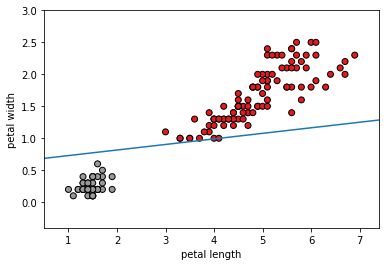

In [65]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

slope = -(network.weights[0]/network.weights[1])
offset = -network.bias/network.weights[1]
plt.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset])

plt.figure(1, figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='black')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()